In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import pandas_profiling
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Embedding
import plotly.express as px

In [0]:
data=pd.read_csv("/content/drive/My Drive/Projects/Banking ananlytics/BTC_price.csv")

In [0]:
data.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01T04:00:00.000Z,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02T04:00:00.000Z,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03T04:00:00.000Z,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04T04:00:00.000Z,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05T04:00:00.000Z,121.33866,118.67466,121.93633,118.00566


In [0]:
fig = px.line(data, x='Date', y='Closing Price (USD)')
fig.show()

# Standarization

In [0]:
values = data.iloc[0:,2:].values

scaler = StandardScaler()
scaler = scaler.fit(values)

normalized = scaler.transform(values)
normalized

array([[-0.79135552, -0.79043273, -0.78639951, -0.79659672],
       [-0.79087458, -0.7906064 , -0.78614026, -0.79629817],
       [-0.79538206, -0.79012523, -0.78616416, -0.80754065],
       ...,
       [ 1.30514655,  1.33037201,  1.2725635 ,  1.35048048],
       [ 1.29796127,  1.30332836,  1.26608957,  1.3679362 ],
       [ 1.36662064,  1.29970935,  1.32018854,  1.36845826]])

# Spliting of dataset

In [0]:
prediction_days = 600
df_train= normalized[0:prediction_days,0]
df_test= normalized[prediction_days-50,0]

In [0]:
def fea(data,n):
    features= []
    labels = []
    for i in range(n, len(data)):
        features.append(data[i-n:i])
       
        labels.append(data[i])
    features, labels = np.array(features), np.array(labels)
    return(features, labels)

In [0]:
train, labels_train= fea(df_train,50)
train.shape

(550, 50)

In [0]:

train_size = int(len(normalized) * 0.67)
test_size = len(normalized) - train_size
train, test = normalized[0:train_size, :], normalized[train_size:len(normalized), :]
print(len(train), len(test))

1476 727


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

# Reshaping

In [0]:
look_back = 10
trainX, trainY = create_dataset(normalized, look_back=50)
testX, testY = create_dataset(normalized, look_back=50)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# LSTM

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout

Train on 2152 samples, validate on 2152 samples
Epoch 1/100
 - 1s - loss: 1.2361 - val_loss: 1.1346
Epoch 2/100
 - 0s - loss: 1.0901 - val_loss: 1.0129
Epoch 3/100
 - 0s - loss: 0.9787 - val_loss: 0.9188
Epoch 4/100
 - 0s - loss: 0.8918 - val_loss: 0.8486
Epoch 5/100
 - 0s - loss: 0.8249 - val_loss: 0.7946
Epoch 6/100
 - 0s - loss: 0.7712 - val_loss: 0.7489
Epoch 7/100
 - 0s - loss: 0.7232 - val_loss: 0.7044
Epoch 8/100
 - 0s - loss: 0.6752 - val_loss: 0.6575
Epoch 9/100
 - 0s - loss: 0.6260 - val_loss: 0.6078
Epoch 10/100
 - 0s - loss: 0.5755 - val_loss: 0.5571
Epoch 11/100
 - 0s - loss: 0.5256 - val_loss: 0.5075
Epoch 12/100
 - 0s - loss: 0.4781 - val_loss: 0.4610
Epoch 13/100
 - 0s - loss: 0.4353 - val_loss: 0.4196
Epoch 14/100
 - 0s - loss: 0.4000 - val_loss: 0.3860
Epoch 15/100
 - 0s - loss: 0.3727 - val_loss: 0.3595
Epoch 16/100
 - 0s - loss: 0.3496 - val_loss: 0.3362
Epoch 17/100
 - 0s - loss: 0.3277 - val_loss: 0.3147
Epoch 18/100
 - 0s - loss: 0.3072 - val_loss: 0.2961
Epoch 1

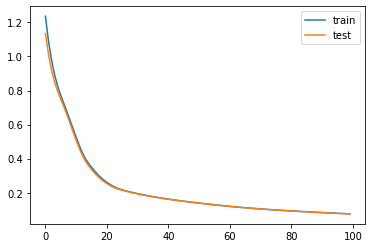

In [0]:

model = Sequential()
model.add(LSTM(4, input_shape=(1, 50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#history=model.fit(train, labels_train, epochs = 50, batch_size = 150, validation_data=(test, labels_test), verbose=2, shuffle=False)
history=model.fit(trainX, trainY, epochs=100, batch_size=256, validation_data=(testX, testY),verbose=2, shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Mean square error (MSE)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(trainY, trainPredict)

0.07554651699763121

In [0]:
mean_squared_error(testY, testPredict)

0.07554651699763121